# Exploratory Data Analysis

# 🧠 About the Dataset
This notebook uses historical daily data from the S&P 500 index, collected from Yahoo Finance via the `yfinance` library. We’ll explore patterns in price, volume, and market behavior from 2010 to 2024.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/sp500.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df = df[1:]
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.56005859375,1133.8699951171875,1116.56005859375,1132.989990234375,1132.989990234375,3991400000
2010-01-05,1132.6600341796875,1136.6300048828125,1129.6600341796875,1136.52001953125,1136.52001953125,2491020000
2010-01-06,1135.7099609375,1139.18994140625,1133.949951171875,1137.1400146484375,1137.1400146484375,4972660000
2010-01-07,1136.27001953125,1142.4599609375,1131.3199462890625,1141.68994140625,1141.68994140625,5270680000
2010-01-08,1140.52001953125,1145.3900146484375,1136.219970703125,1144.97998046875,1144.97998046875,4389590000


## 🔍 Initial Cleaning and Data Checks
We begin by loading the data, cleaning it, and ensuring types are correct. Then we confirm that the data is sorted by date and has no missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       3774 non-null   object
 1   High       3774 non-null   object
 2   Low        3774 non-null   object
 3   Close      3774 non-null   object
 4   Adj Close  3774 non-null   object
 5   Volume     3774 non-null   object
dtypes: object(6)
memory usage: 206.4+ KB


In [3]:
# Convert all price/volume columns to float
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.index.is_monotonic_increasing

True

## Check for missing values


In [6]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 📊 Summary Statistics
This block summarizes the central tendency, spread, and shape of each feature’s distribution.

In [7]:
# Summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,2727.736940,2742.224616,2712.214531,2728.274880,2728.274880,3.938713e+09
std,1264.940853,1271.299419,1258.193109,1264.990492,1264.990492,9.513684e+08
min,1027.650024,1032.949951,1010.909973,1022.580017,1022.580017,0.000000e+00
25%,1700.017487,1707.684998,1693.692535,1702.179962,1702.179962,3.374318e+09
50%,2431.929932,2441.444946,2420.329956,2432.114990,2432.114990,3.783425e+09
75%,3816.820007,3845.267517,3791.010010,3818.822571,3818.822571,4.301015e+09
max,6089.029785,6099.970215,6079.979980,6090.270020,6090.270020,1.061781e+10


In [8]:
# Check date range
df.index.min(), df.index.max()

(Timestamp('2010-01-04 00:00:00'), Timestamp('2024-12-31 00:00:00'))

# Plots

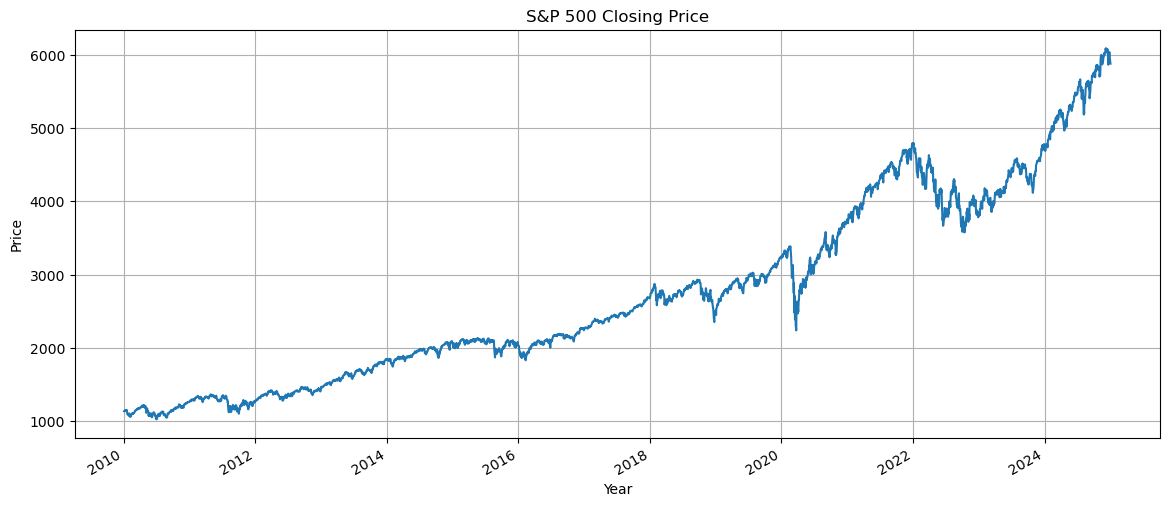

In [9]:
# Plot Closing Price Over Time
plt.figure(figsize=(14, 6))
df['Close'].plot(title='S&P 500 Closing Price')
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()

## 📈 Daily Returns
We calculate the daily percentage return of the S&P 500 using the `Close` price and examine its distribution.

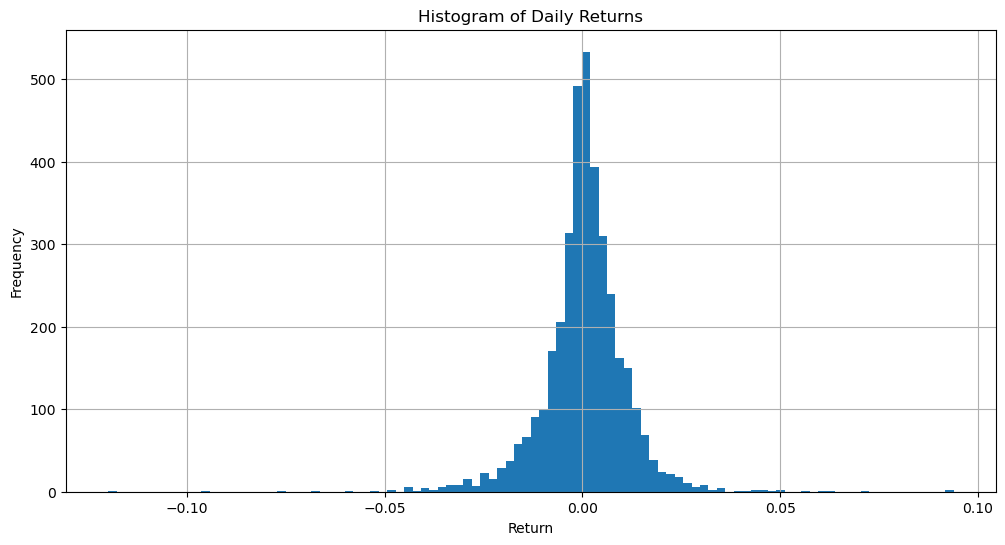

In [12]:
# Calculate daily return and plot histogram
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].hist(bins=100, figsize=(12,6))
plt.title('Histogram of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 📉 Rolling Volatility
Rolling volatility shows how the standard deviation of daily returns changes over time.

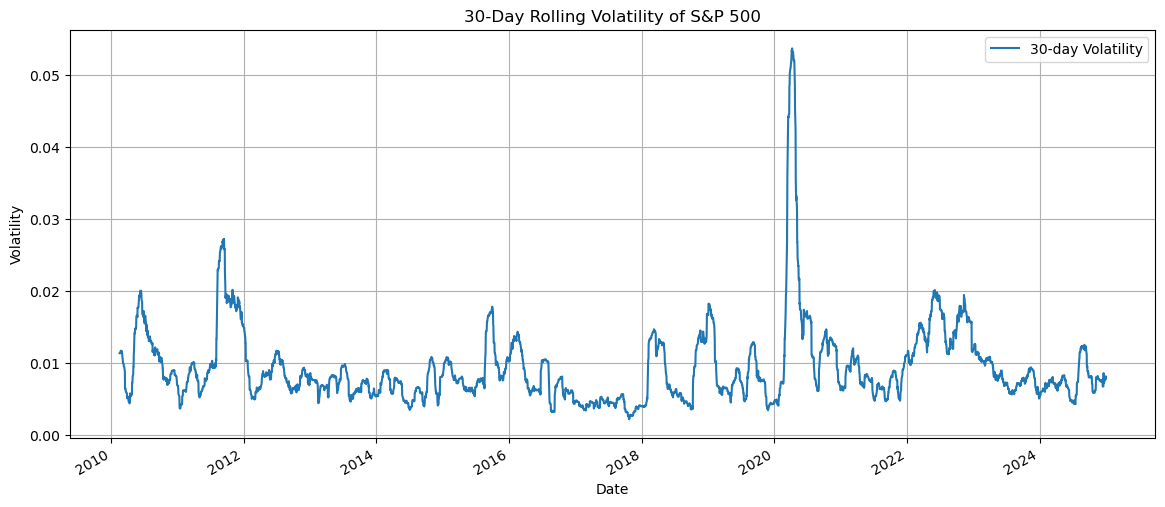

In [18]:
# 30-day rolling standard deviation
rolling_vol = df['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
rolling_vol.plot(label='30-day Volatility')
plt.title('30-Day Rolling Volatility of S&P 500')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()

## 📈 Rolling Moving Averages
We compute 50-day and 200-day moving averages to identify long-term market trends.

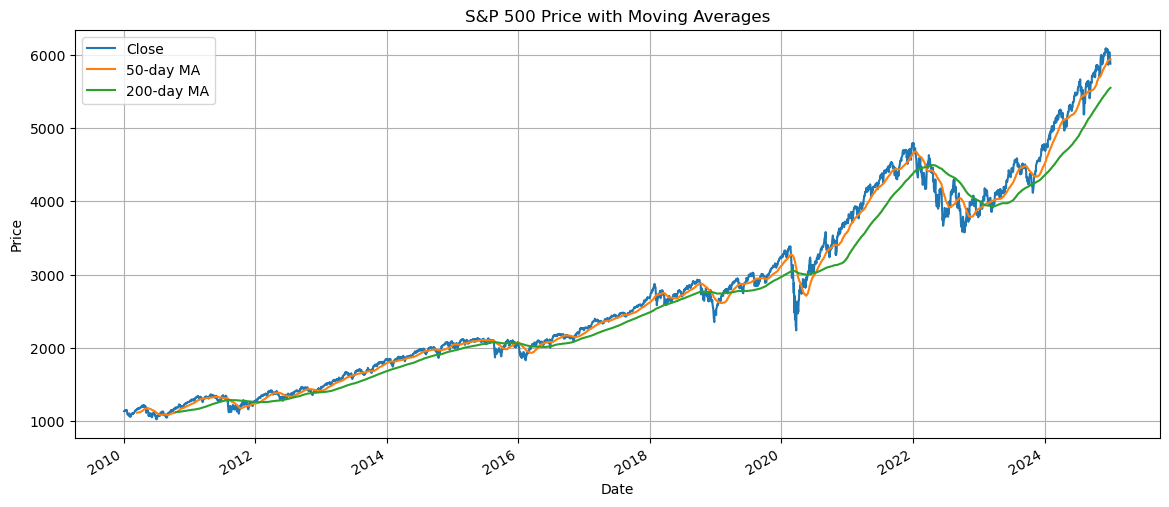

In [13]:
# Compute moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot
plt.figure(figsize=(14, 6))
df['Close'].plot(label='Close')
df['MA50'].plot(label='50-day MA')
df['MA200'].plot(label='200-day MA')
plt.title('S&P 500 Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

## 📐 Technical Indicators
Technical indicators help us capture price momentum, trend direction, and volatility. These are widely used by traders to make informed decisions. Below are some of the most common indicators:

- **RSI (Relative Strength Index):** Measures recent gains vs. losses over a 14-day window. Values >70 suggest overbought, <30 oversold.
- **MACD (Moving Average Convergence Divergence):** Compares short-term and long-term momentum via EMA crossovers.
- **Bollinger Bands:** Plots bands two standard deviations above and below a moving average.
- **Daily Return:** Percentage change in price from previous day (already added).


In [14]:
# RSI (Relative Strength Index)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Add RSI to DataFrame
df['RSI'] = compute_rsi(df['Close'])

In [15]:
# MACD (12-day EMA minus 26-day EMA)
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
# Signal line (9-day EMA of MACD)
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [16]:
# Bollinger Bands
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()
df['Bollinger Upper'] = rolling_mean + (2 * rolling_std)
df['Bollinger Lower'] = rolling_mean - (2 * rolling_std)

## 🎯 Labeling Market Movement
To train a model, we need labeled data. We'll classify the next day's movement as:
- **1** if the closing price went up
- **0** if the price went down or stayed the same

This binary label helps us frame the problem as a classification task.

In [17]:
# Create binary label for next-day price movement
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df['Target'].value_counts()

Target
1    2055
0    1719
Name: count, dtype: int64